In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***import labraries***

In [24]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ***ML Models***

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 📥 Step 1: Load dataset
df = pd.read_csv("/content/drive/MyDrive/student academic dataset/data.csv", delimiter=';')
print(df.shape)
display(df.head())

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## ***🧹 Step 2: Preprocessing and Label Encoding***

In [26]:
# Check how many null values are in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

# ***Handle Missing Values***

In [27]:
# Drop rows with missing values
df = df.dropna()
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (4424, 37)


# ***Fill missing values***

In [28]:
# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)
print("Missing values after filling:", df.isnull().sum().sum())


Missing values after filling: 0


/tmp/ipython-input-28-2727400933.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# ***Encode Categorical Columns***

In [29]:
# Encode object (categorical) columns using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoders for future decoding if needed

print("Dataset after encoding categorical columns:")
df.head()


Dataset after encoding categorical columns:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# ***Check for Duplicates and Remove***

In [30]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (4424, 37)


# ***Check and Convert Data Types***

In [31]:
# Display data types
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                      

# ***class distribution plot***

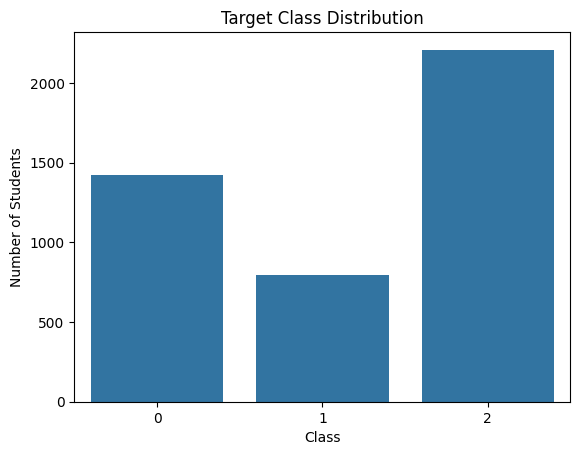

In [32]:
# Class distribution plot
sns.countplot(x=target_col, data=df)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Students')
plt.show()


## ***🎯 Step 3: Split Features and Target***

In [34]:
# Assume target column is named 'Target' or similar (replace accordingly)
target_col = 'Target'  # Change if different
X = df.drop(columns=[target_col])
y = df[target_col]

# Handle class imbalance
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
print("Class Weights:", dict(zip(np.unique(y), weights)))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Class Weights: {np.int64(0): np.float64(1.0377668308702792), np.int64(1): np.float64(1.8572628043660788), np.int64(2): np.float64(0.6675720537196318)}


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-37-509207619.py:18: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


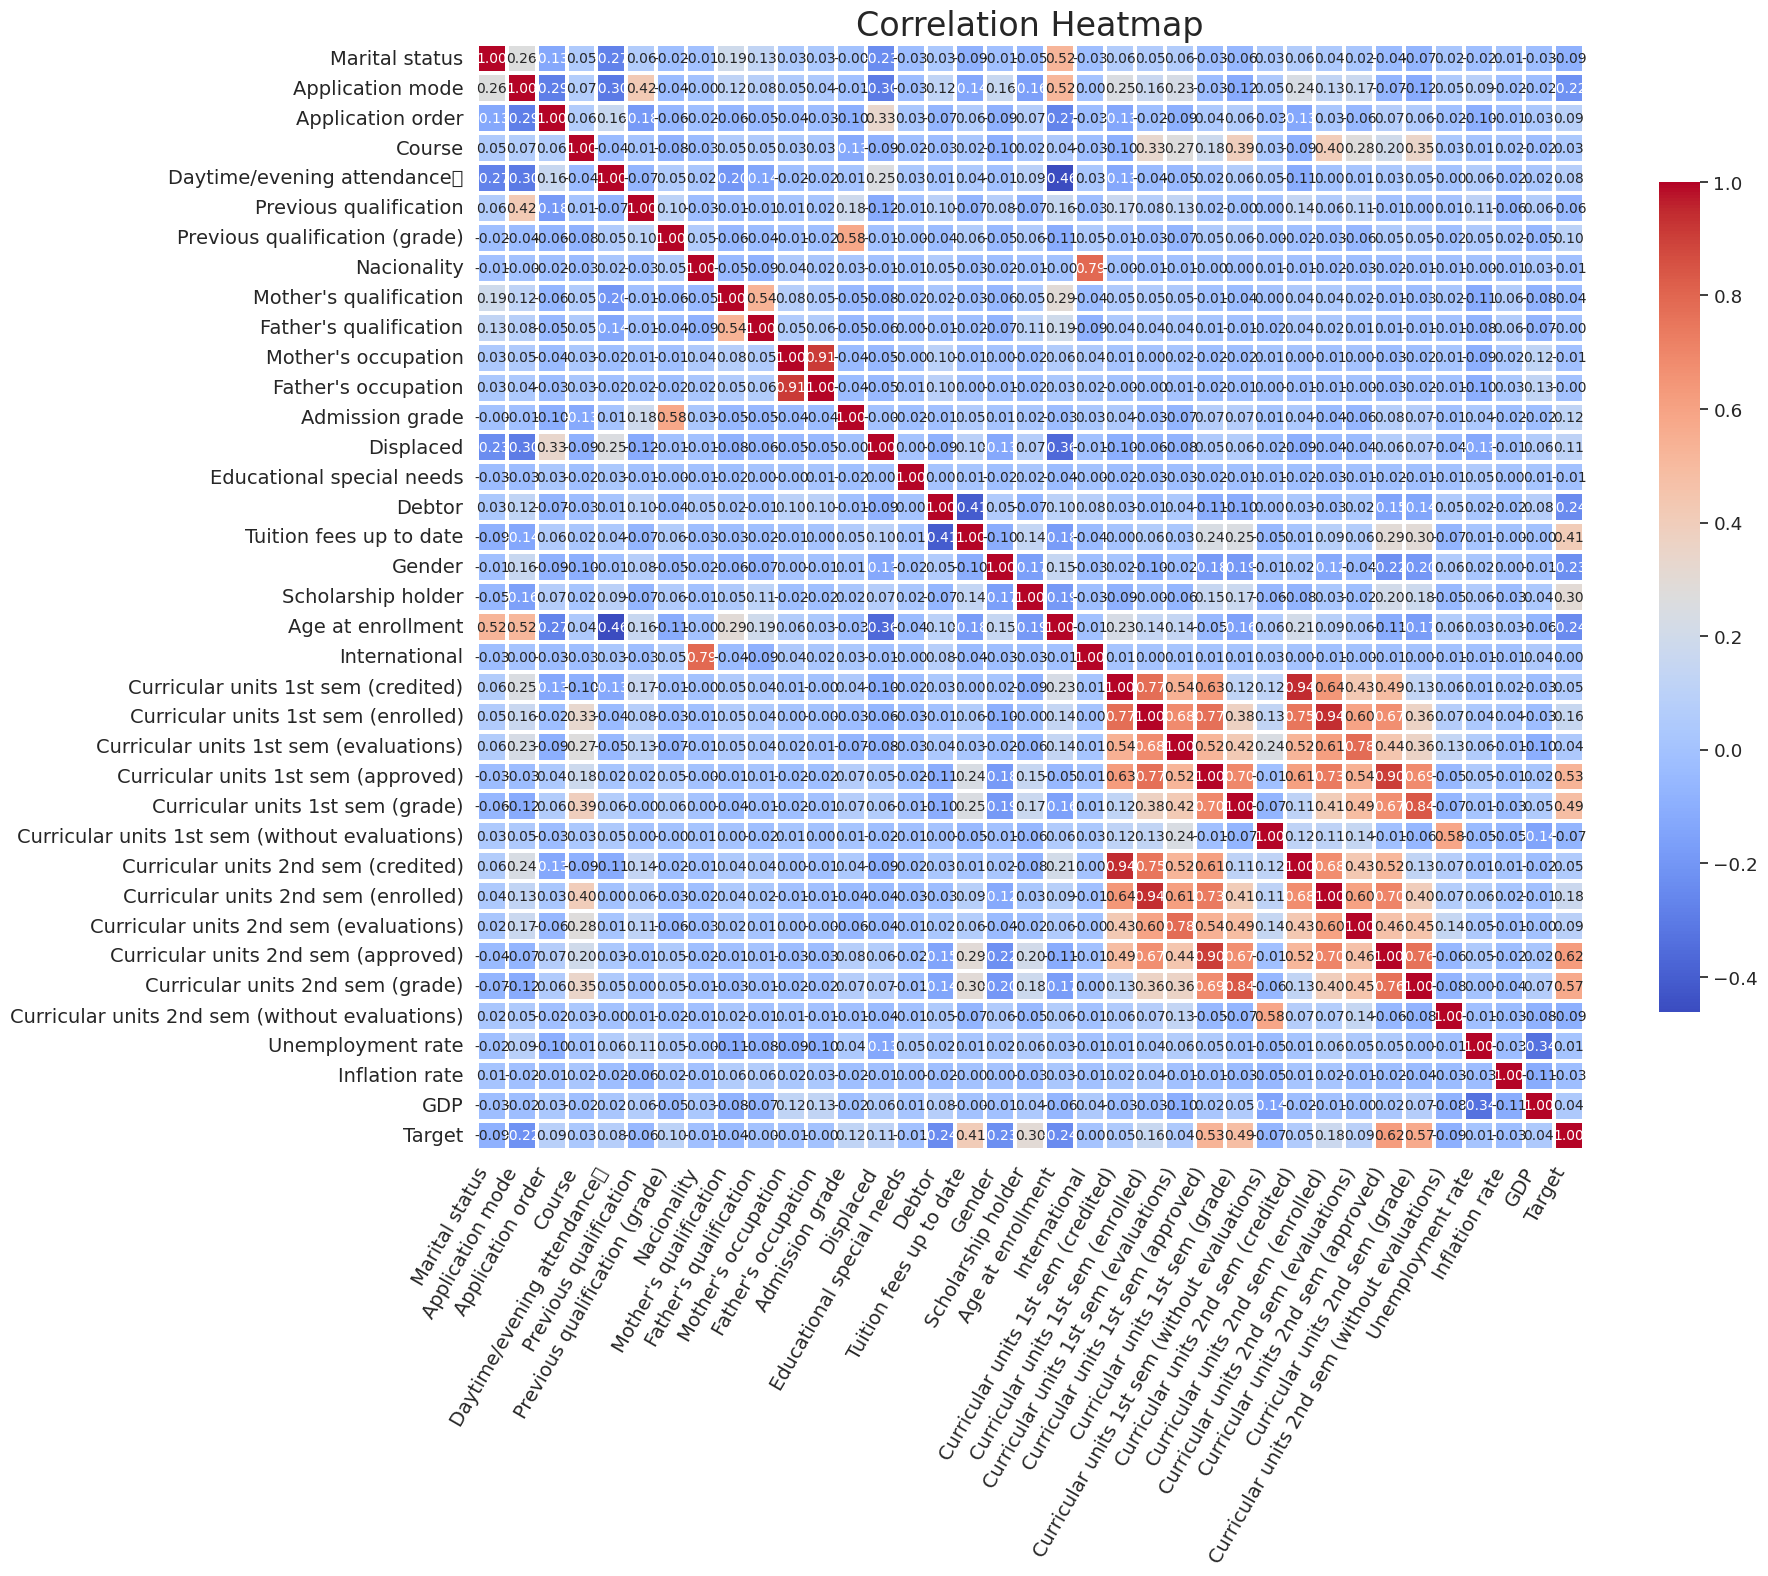

In [37]:
plt.figure(figsize=(20, 16))  # Increased size for clarity
sns.set(font_scale=1.2)  # Controls annotation font size inside heatmap

heatmap = sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=1.5,  # Thicker lines between boxes
    square=True,
    cbar_kws={"shrink": .75},
    annot_kws={"size": 10}  # Controls text size inside each box
)

plt.title("Correlation Heatmap", fontsize=24)
plt.xticks(rotation=60, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

## *🤖 Step 4: Train 8 ML Models and Compare Accuracy*

---



---



In [33]:
# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

accuracies = {}

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Train and evaluate each model
for name, model in models.items():
    if name == "XGBoost":
        # XGBoost requires encoded labels
        model.fit(X_train, y_train_encoded)
        preds_encoded = model.predict(X_test)
        preds = label_encoder.inverse_transform(preds_encoded) # Convert back to original labels for evaluation
    else:
        # Other models can handle string labels
        model.fit(X_train, y_train)
        preds = model.predict(X_test)


    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))


Logistic Regression Accuracy: 0.7684
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885


KNN Accuracy: 0.6678
              precision    recall  f1-score   support

     Dropout       0.73      0.68      0.70       284
    Enrolled       0.28      0.21      0.24       159
    Graduate       0.73      0.83      0.77       442

    accuracy                           0.67       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.65      0.67      0.66       885


Decision Tree Accuracy: 0.6870
              precision    recall  f1-score   support

     Dropout       0.68      0.70      0.69       284
    Enrolled       0.39      0.41    

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:57:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.7672
              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       284
    Enrolled       0.51      0.45      0.48       159
    Graduate       0.82      0.90      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



# ***📊 Step 5: Plot Accuracy Comparison***

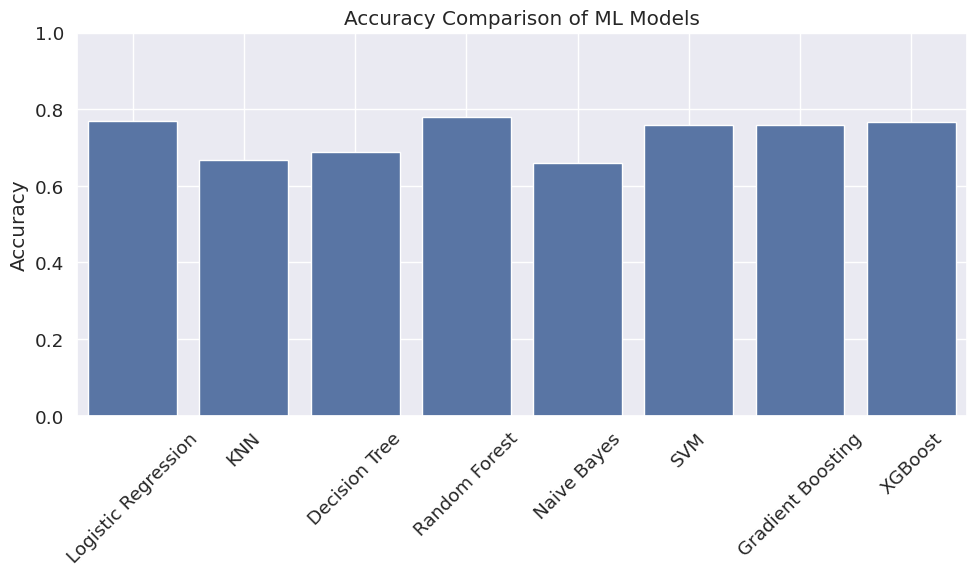

In [38]:
 # Accuracy Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Accuracy Comparison of ML Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()
